In [268]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import json
from shapely.geometry import shape
# La columna GEOJSON queda cortada después de "geomet..." (aparentemente por un bug desconocido?)
# Por lo tanto es imposible extraer el GEOJSON usando python
# Entonces extraigo la columna GeoJson del csv usando una página externa, que lo convierte directamente a un archivo GeoJson

<Axes: >

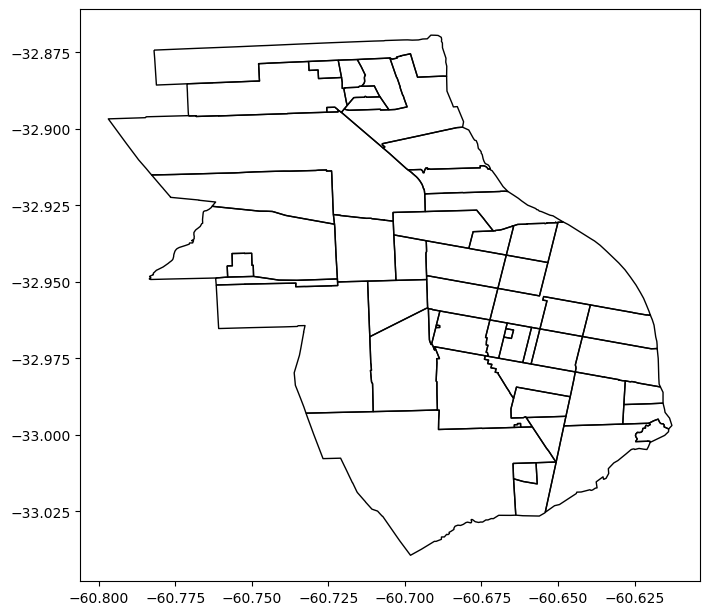

In [270]:
pd.set_option("display.max_colwidth", None) # Muestra todas las celdas completas
barrios_df = pd.read_csv("barrios_json.csv", encoding="cp1252", dtype={"GEOJSON": str})
#print(barrios_df["GEOJSON"])
def convertir_a_geometria(string_geojson):
    # Cargar el string como objeto JSON
    geojson_obj = json.loads(string_geojson)
    # Extraer la geometría y convertirla a objeto Shapely
    return shape(geojson_obj['geometry'])

barrios_df["geometry"] = barrios_df["GEOJSON"].apply(convertir_a_geometria)
barrios_df = barrios_df.drop(columns=["MSLINK", "GEOJSON", "OBSERVACIO"])

barrios_rosario = gpd.GeoDataFrame(barrios_df, geometry='geometry')
barrios_rosario.plot(figsize=(8,8), color="None", edgecolor="black")


<Axes: >

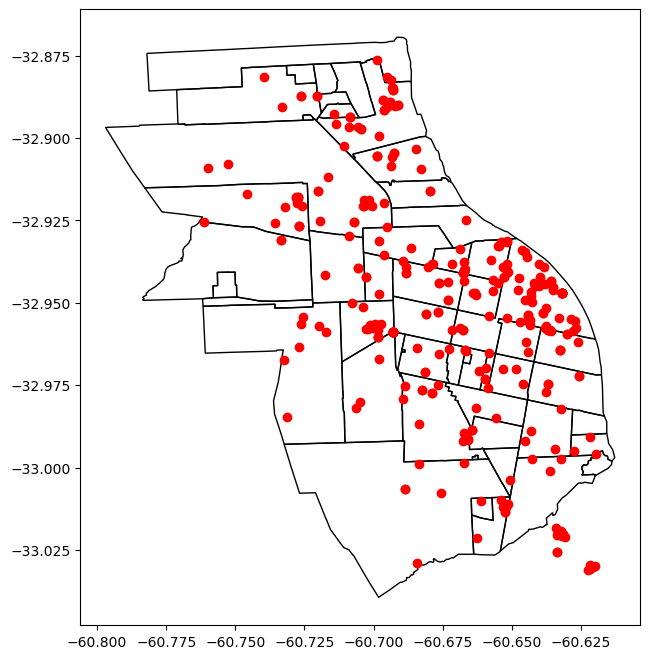

In [272]:
datos_rosario = pd.read_excel("Rosario F.xlsx")
# Eliminamos los datos que están por fuera de nuestro mapa de la ciudad de Rosario
datos_rosario = datos_rosario[datos_rosario.Coord1__Latitude < -32.85]
datos_rosario = datos_rosario[datos_rosario.Coord1__Longitude < -60.5]
datos_rosario = datos_rosario[datos_rosario.Coord1__Longitude > -60.78]

barrios_rosario_2 = gpd.read_file("barrios.geojson")
nombre_barrios = pd.read_csv("barrios_json.csv")
nombre_barrios = nombre_barrios["BARRIO"]
encuestados = gpd.GeoDataFrame(
    datos_rosario, geometry=gpd.points_from_xy(datos_rosario.Coord1__Longitude,datos_rosario.Coord1__Latitude, crs="EPSG:4326")
)
barrios_rosario_final = pd.concat([barrios_rosario_2, nombre_barrios])
barrios_rosario_2 = barrios_rosario_final.plot(figsize=(8,8), color="None", edgecolor="black")
encuestados.plot(ax=barrios_rosario_2, marker="o", color="red")